In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


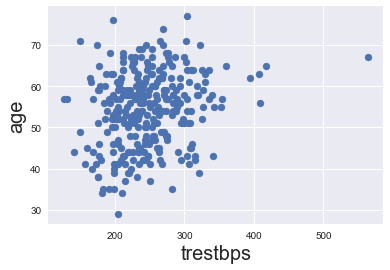

In [4]:
plt.scatter(data['chol'],data['age'])
plt.xlabel("trestbps", fontsize=20)
plt.ylabel("age", fontsize=20)
plt.show()

In [5]:
x = data[['trestbps','thalach','chol','age']]

In [6]:
x.head()

,trestbps,thalach,chol,age
0,145,150,233,63
1,130,187,250,37
2,130,172,204,41
3,120,178,236,56
4,120,163,354,57


In [26]:
kmeans = KMeans(3)

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0,

In [28]:
data_with_clusters = x.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,trestbps,thalach,chol,age,Cluster
0,145,150,233,63,2
1,130,187,250,37,2
2,130,172,204,41,0
3,120,178,236,56,2
4,120,163,354,57,1


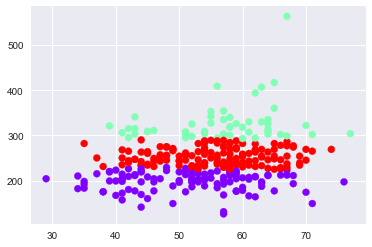

In [29]:
plt.scatter(data_with_clusters['age'],data_with_clusters['chol'],c=data_with_clusters['Cluster'],cmap='rainbow')

plt.show()

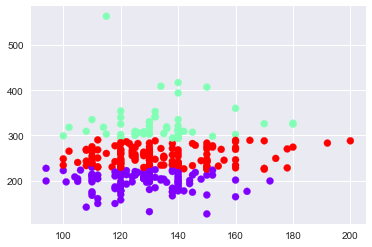

In [30]:
plt.scatter(data_with_clusters['trestbps'],data_with_clusters['chol'],c=data_with_clusters['Cluster'],cmap='rainbow')

plt.show()

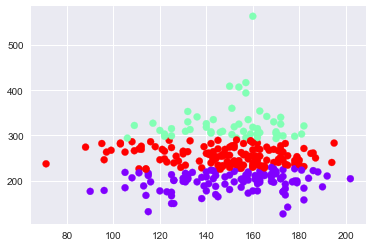

In [31]:
plt.scatter(data_with_clusters['thalach'],data_with_clusters['chol'],c=data_with_clusters['Cluster'],cmap='rainbow')

plt.show()

In [32]:
kmeans.inertia_

470256.92003908346

In [33]:
wcss = []

for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [34]:
wcss

[1087545.5379537954, 603636.7947715498, 470256.92003908346, 390069.2916540655]

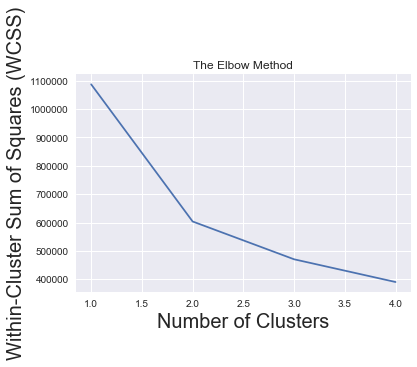

In [35]:
number_clusters = range(1,5)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters", fontsize=20)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=20)
plt.show()